In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import scipy
import scipy.stats
from scipy.stats import kde
from p4tools import io

In [2]:
ResultsPath = '../../Data/SummaryResults/'
ClusteringPath = '../../Data/ClusteringResults/'
FiguresPath = '../../Data/Figures/'
if not os.path.isdir(FiguresPath):
    os.mkdir(FiguresPath)
ExpectedRegionCount=28
ExpectedImageCount=221


In [3]:

#add some missing region names
metadata_df = io.get_meta_data()
region_names_df = io.get_region_names()
region_names_df = region_names_df.set_index('obsid')
region_names_df.at['ESP_012620_0975','roi_name'] = 'Buffalo'
region_names_df.at['ESP_012277_0975','roi_name'] = 'Buffalo'
region_names_df.at['ESP_012348_0975','roi_name'] = 'Taichung'
for index, row in metadata_df.iterrows():
    roi_name = region_names_df.at[row['OBSERVATION_ID'],'roi_name']
    lat_WORD = region_names_df.at[row['OBSERVATION_ID'],'lat_WORD']
    metadata_df.at[index,'roi_name']=roi_name
    metadata_df.at[index,'lat_WORD']=lat_WORD
unique_region_df=metadata_df.groupby('roi_name').first()
unique_region_df=unique_region_df.sort_index()
unique_region_df

,OBSERVATION_ID,IMAGE_CENTER_LATITUDE,IMAGE_CENTER_LONGITUDE,SOLAR_LONGITUDE,START_TIME,map_scale,north_azimuth,# of tiles,lat_WORD
roi_name,,,,,,,,,
Albany,ESP_012225_0980,-81.9461,60.4644,221.812,2009-03-06 01:35:09,0.50,108.574809,144,-81.930
Atka,ESP_012038_0930,-86.9844,169.8150,212.826,2009-02-19 11:51:15,0.25,153.963594,270,-86.980
Bilbao,ESP_011420_0930,-87.0093,127.3170,184.304,2009-01-02 08:07:26,1.00,157.311404,54,-87.008
Binghamton,ESP_012254_1065,-73.4875,339.5220,223.218,2009-03-08 07:51:41,0.25,100.857869,455,-73.530
BuenosAires,ESP_011370_0980,-81.9247,4.8129,182.088,2008-12-29 10:39:09,0.50,110.580189,126,-81.901
Buffalo,ESP_012277_0975,-82.5184,80.0468,224.333,2009-03-10 02:49:25,0.50,107.561361,144,-81.801
Caterpillar,ESP_011680_1055,-74.2302,168.5210,196.062,2009-01-22 14:25:49,0.25,98.968347,500,-74.220
Cortland,ESP_011413_0970,-82.6986,273.1290,183.994,2009-01-01 19:03:46,0.50,112.770664,108,-82.690
Geneseo,ESP_022193_0950,-85.1719,91.9143,278.375,2011-04-21 18:43:52,0.50,118.334067,54,-85.180


In [4]:
#step 1: load all the summary results for each image
ML_df = pd.read_csv(ResultsPath+'SemanticSegmenterCNN_LORO_by_regions.csv',index_col=0)
ML_df.insert(1,'Latitude',unique_region_df['lat_WORD'])
ML_image_df = pd.read_csv(ResultsPath+'SemanticSegmenterCNN_LORO_by_image.csv',index_col=0)
Clustering_df = pd.read_csv(ClusteringPath+'Clustering_by_region.csv',index_col=0)
Clustering_image_df = pd.read_csv(ClusteringPath+'Clustering_by_image.csv',index_col=0)

ML_df['Bubblesize']=(np.square(ML_df['Region Dice'])*3000).astype('int')
Clustering_df['Bubblesize']=(np.square(Clustering_df['Region Dice'])*3000).astype('int')

ML_image_df['Bubblesize']=(np.square(ML_image_df['Dice'])*3000).astype('int')
Clustering_image_df['Bubblesize']=(np.square(Clustering_image_df['Dice'])*3000).astype('int')

ML_df=ML_df.sort_values('Latitude')
Clustering_df=Clustering_df.reindex(ML_df.index)

assert ML_image_df.shape[0]==ExpectedImageCount
assert Clustering_image_df.shape[0]==ExpectedImageCount
assert ML_df.shape[0]==ExpectedRegionCount
assert Clustering_df.shape[0]==ExpectedRegionCount

In [5]:
ML_df

,NumImages,Latitude,Total TP,Total FP,Total FN,Total TN,Total Centre P4 Count,Total Centre Correct Count,Region JI,Region Dice,Region Precision,Region Recall,Region Area Ratio,Region Centre Correct Fraction,Median JI,Median Dice,Median Precision,Median Recall,Median Area Ratio,Median Centre Correct Fraction,Max JI,Max Dice,Max Precision,Max Recall,Max Area Ratio,Max Centre Correct Fraction,Min JI,Min Dice,Min Precision,Min Recall,Min Area Ratio,Min Centre Correct Fraction,Bubblesize
Portsmouth,11.0,-87.302,34050262.0,27703393.0,36410976.0,9.633125e+08,67419.0,28893.0,0.346869,0.515075,0.551389,0.483248,1.141005,0.428559,0.342957,0.510749,0.506892,0.480058,1.084057,0.435267,0.409780,0.581339,0.852124,0.652845,9.219895,0.591430,0.090963,0.166758,0.265962,0.092422,0.634630,0.171989,795
Bilbao,10.0,-87.008,19993754.0,22826216.0,20652334.0,7.633935e+08,9104.0,7311.0,0.315000,0.479087,0.466926,0.491899,0.949232,0.803054,0.327681,0.490187,0.623595,0.497521,1.181138,0.693784,0.500874,0.667443,0.802130,0.687048,3.475838,0.944516,0.034943,0.067527,0.072395,0.043477,0.194880,0.066667,688
Halifax,3.0,-87.000,752307.0,515989.0,2936280.0,1.461531e+08,2709.0,948.0,0.178926,0.303540,0.593164,0.203955,2.908301,0.349945,0.241417,0.388938,0.756808,0.326424,2.519125,0.561471,0.345586,0.513659,0.903815,0.358781,5.179332,0.930000,0.139567,0.244948,0.481069,0.146121,1.473757,0.174492,276
Oswego_Edge,16.0,-87.000,15379171.0,13427365.0,18893029.0,1.130817e+09,9180.0,6148.0,0.322417,0.487618,0.533878,0.448736,1.189737,0.669717,0.323260,0.488568,0.647498,0.536464,1.278973,0.601763,0.599610,0.749695,0.829909,0.814765,74.486370,0.976705,0.007441,0.014772,0.309431,0.007567,0.530815,0.015152,713
Manhattan_Frontinella,8.0,-86.987,5205318.0,4277223.0,5049831.0,5.419600e+08,1993.0,1389.0,0.358188,0.527450,0.548937,0.507581,1.081477,0.696939,0.450764,0.620986,0.557819,0.657179,0.963302,0.717220,0.591714,0.743493,0.696988,0.828144,4.306415,0.965986,0.086162,0.158654,0.420942,0.097748,0.638319,0.139896,834
Atka,3.0,-86.980,624357.0,955597.0,1957592.0,1.641561e+08,1096.0,663.0,0.176494,0.300034,0.395174,0.241816,1.634193,0.604927,0.294478,0.454975,0.540574,0.392780,1.376277,0.585774,0.370018,0.540165,0.580959,0.504725,1.741416,0.731034,0.145458,0.253973,0.348123,0.199908,1.151041,0.355191,270
Pisaq,4.0,-86.800,6443351.0,4789485.0,5033577.0,2.528145e+08,12554.0,8556.0,0.396114,0.567452,0.573617,0.561418,1.021730,0.681536,0.397586,0.568676,0.575192,0.600313,0.859225,0.682051,0.519398,0.683689,0.671419,0.708570,1.280414,0.951302,0.327194,0.493062,0.430113,0.524376,0.744663,0.583929,966
Manhattan_Classic,17.0,-86.390,47304732.0,36471304.0,26640012.0,1.162115e+09,14081.0,11237.0,0.428423,0.599854,0.564657,0.639731,0.882648,0.798026,0.441437,0.612496,0.637933,0.622026,0.900855,0.720143,0.616989,0.763133,0.720748,0.872739,1.491828,0.973684,0.069883,0.130637,0.097675,0.186413,0.250590,0.358586,1079
Manhattan_Cracks,6.0,-86.250,11943077.0,7078836.0,8663957.0,4.734413e+08,9229.0,6736.0,0.431378,0.602745,0.627859,0.579563,1.083331,0.729873,0.392080,0.562911,0.600605,0.511241,1.164698,0.657990,0.576495,0.731363,0.681923,0.869519,1.539284,0.924731,0.014469,0.028525,0.036216,0.023528,0.725792,0.275862,1089
Macclesfield,14.0,-85.401,74936989.0,84087280.0,29230297.0,1.104915e+09,16669.0,12044.0,0.398062,0.569448,0.471230,0.719391,0.655040,0.722539,0.463675,0.633526,0.573555,0.793078,0.722936,0.825411,0.641750,0.781788,0.737147,0.918759,1.494286,0.925295,0.211089,0.348594,0.291485,0.427753,0.469696,0.384004,972


In [6]:
### summary info
TotalPixels = ML_df['Total TP'].sum()+ML_df['Total FP'].sum()+ML_df['Total FN'].sum()+ML_df['Total TN'].sum()
HumanArea = ML_df['Total TP'].sum()+ML_df['Total FN'].sum()
CNNArea = ML_df['Total TP'].sum()+ML_df['Total FP'].sum()
CNNDice = 2*ML_df['Total TP'].sum()/(2*ML_df['Total TP'].sum()+ML_df['Total FP'].sum()+ML_df['Total FN'].sum())
CNN_Recall = ML_df['Total TP'].sum()/(ML_df['Total TP'].sum()+ML_df['Total FN'].sum())
CNN_Precision = ML_df['Total TP'].sum()/(ML_df['Total TP'].sum()+ML_df['Total FP'].sum())
CNN_Specificity = ML_df['Total TN'].sum()/(ML_df['Total TN'].sum()+ML_df['Total FP'].sum())

CNN_TotalCentresCorrect = ML_df['Total Centre Correct Count'].sum()/ML_df['Total Centre P4 Count'].sum()

TotalPixelsClustering = Clustering_df['Total TP'].sum()+Clustering_df['Total FP'].sum()+Clustering_df['Total FN'].sum()+Clustering_df['Total TN'].sum()
ClusteringArea = Clustering_df['Total TP'].sum()+Clustering_df['Total FP'].sum()
ClusteringDice = 2*Clustering_df['Total TP'].sum()/(2*Clustering_df['Total TP'].sum()+Clustering_df['Total FP'].sum()+Clustering_df['Total FN'].sum())
Clustering_Recall = Clustering_df['Total TP'].sum()/(Clustering_df['Total TP'].sum()+Clustering_df['Total FN'].sum())
Clustering_Precision = Clustering_df['Total TP'].sum()/(Clustering_df['Total TP'].sum()+Clustering_df['Total FP'].sum())
Clustering_Specificity = Clustering_df['Total TN'].sum()/(Clustering_df['Total TN'].sum()+Clustering_df['Total FP'].sum())

Clustering_TotalCentresCorrect = Clustering_df['Total Centre Correct Count'].sum()/Clustering_df['Total Centre P4 Count'].sum()

print(HumanArea/TotalPixels,CNNArea/TotalPixels,ClusteringArea/TotalPixelsClustering)



0.05675270029534522 0.06836568148651033 0.11167339906952772


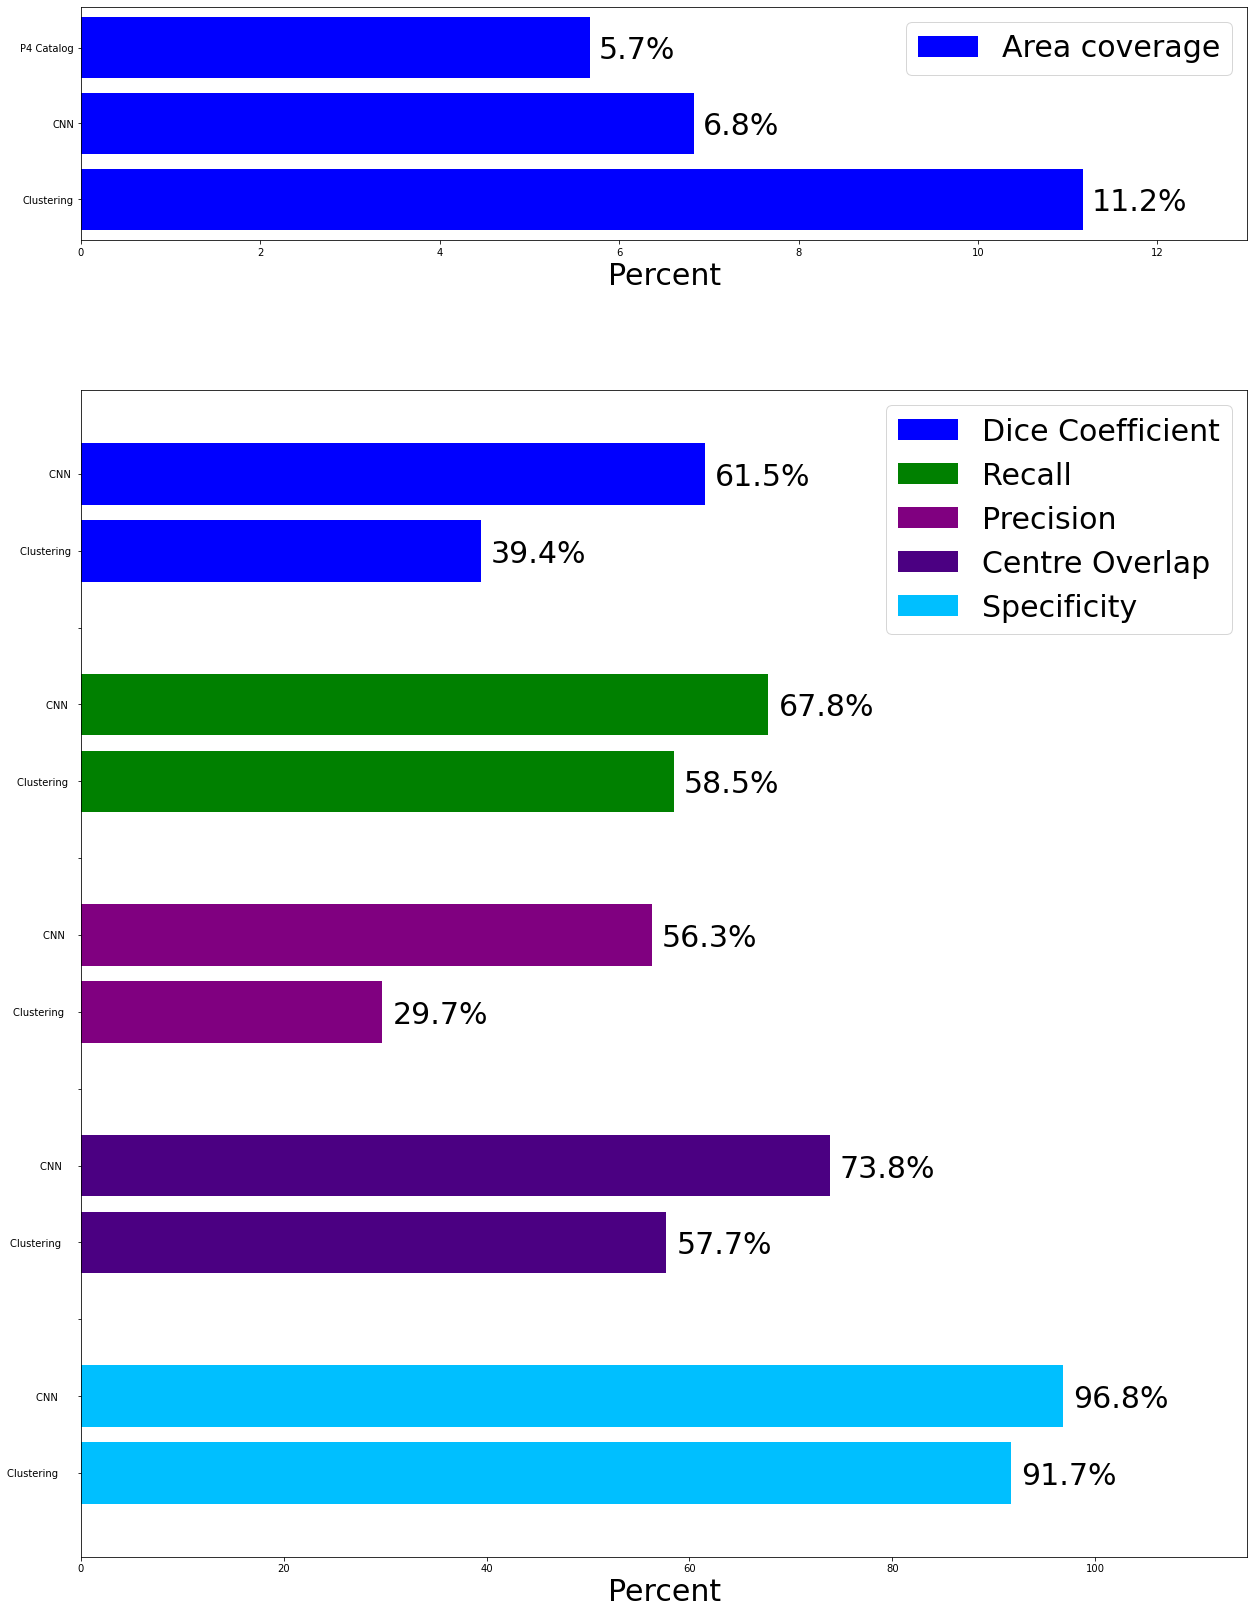

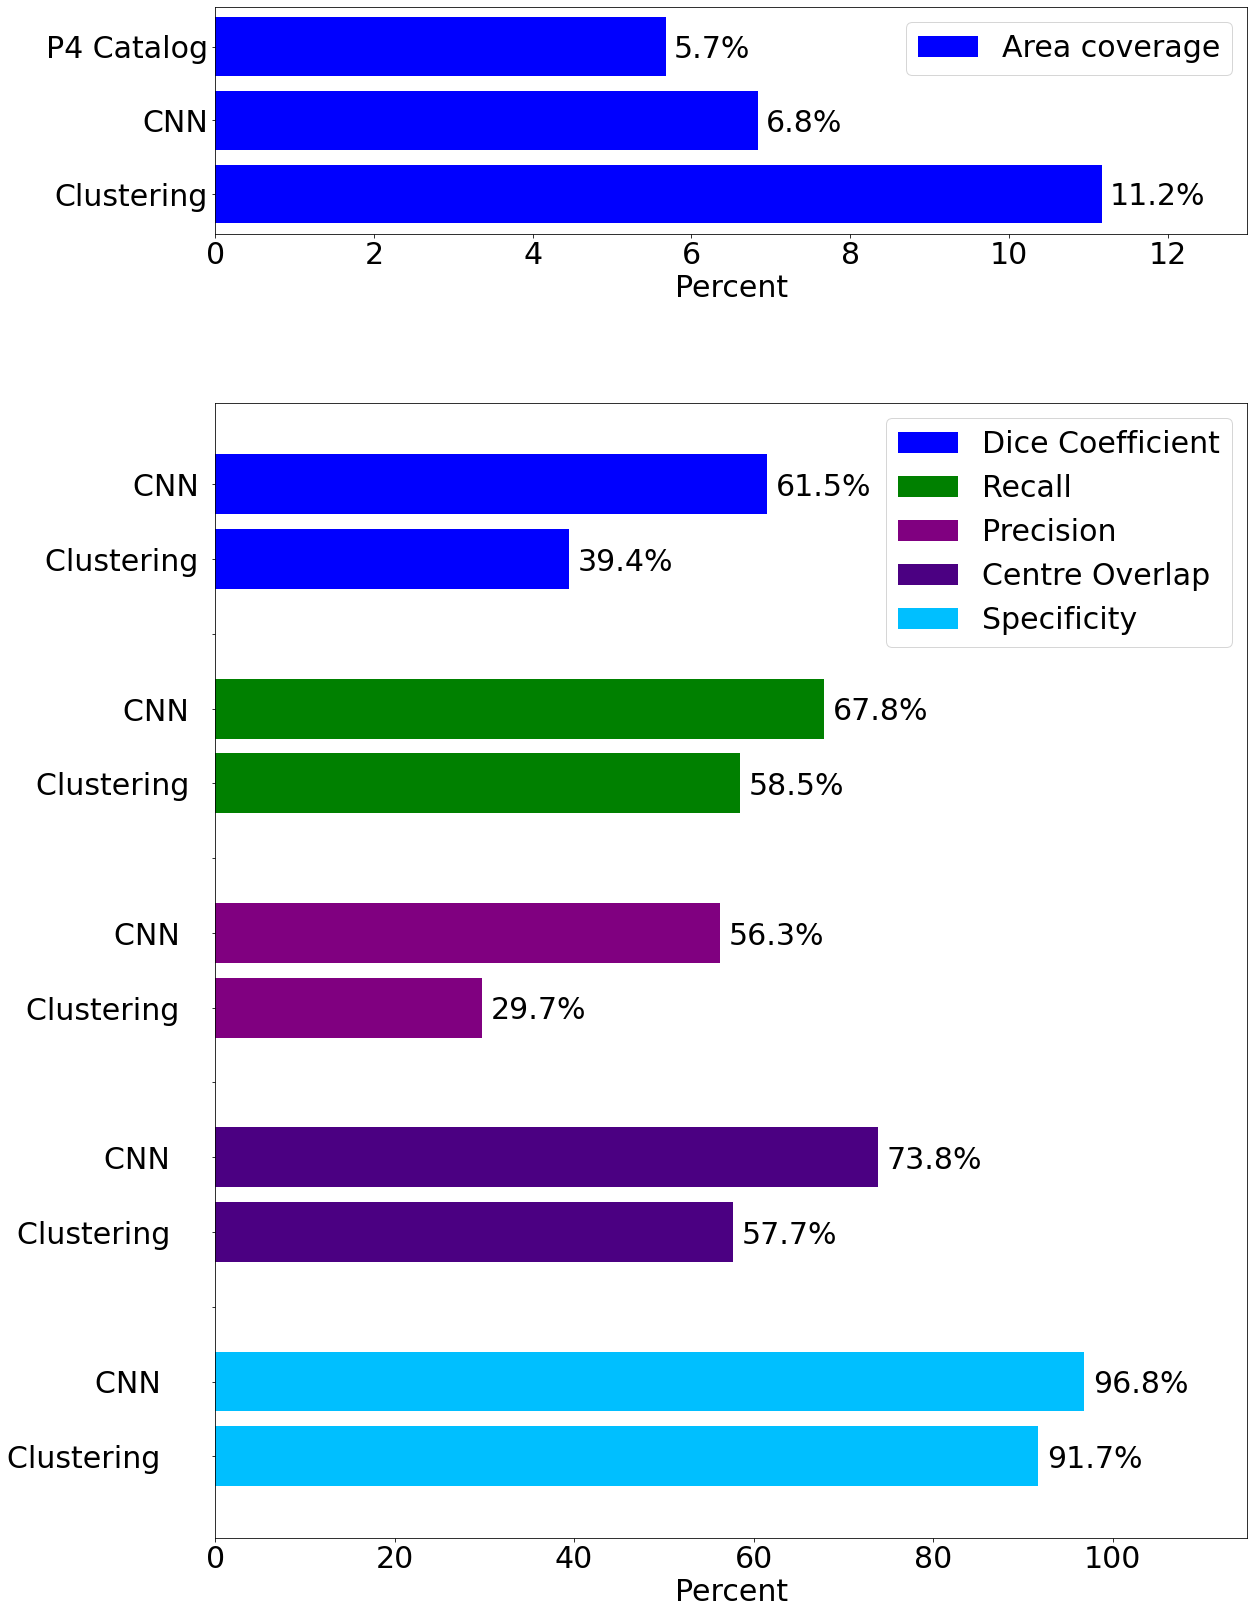

In [7]:
## summary figure with subplots   
for iii in range(2): #quick hack to ensure font sizes are right, as I couldn't do it except by running twice
    fig, [ax1,ax2] = plt.subplots(nrows=2, ncols=1,figsize=(20,25),gridspec_kw={'height_ratios': [1, 5]})

    matplotlib.rc('xtick', labelsize=30) 
    matplotlib.rc('ytick', labelsize=30)

    bar=ax2.barh(['Clustering     '],100*Clustering_Specificity,label='Specificity',color='deepskyblue')
    ax2.text(bar[0].get_width() + 1,bar[0].get_y()+0.25,str(round(bar[0].get_width(),1))+'%', fontsize=30)
    bar=ax2.barh(['CNN     '],100*CNN_Specificity,color='deepskyblue')
    ax2.text(bar[0].get_width() + 1,bar[0].get_y()+0.25,str(round(bar[0].get_width(),1))+'%', fontsize=30)
    ax2.barh(['    '],[0])


    bar=ax2.barh(['Clustering    '],100*Clustering_TotalCentresCorrect,label='Centre Overlap',color='indigo')
    ax2.text(bar[0].get_width() + 1,bar[0].get_y()+0.25,str(round(bar[0].get_width(),1))+'%', fontsize=30)
    bar=ax2.barh(['CNN    '],100*CNN_TotalCentresCorrect,color='indigo')
    ax2.text(bar[0].get_width() + 1,bar[0].get_y()+0.25,str(round(bar[0].get_width(),1))+'%', fontsize=30)
    ax2.barh(['   '],[0])
    bar=ax2.barh(['Clustering   '],100*Clustering_Precision,label='Precision',color='purple')
    ax2.text(bar[0].get_width() + 1,bar[0].get_y()+0.25,str(round(bar[0].get_width(),1))+'%', fontsize=30)
    bar=ax2.barh(['CNN   '],100*CNN_Precision,color='purple')
    ax2.text(bar[0].get_width() + 1,bar[0].get_y()+0.25,str(round(bar[0].get_width(),1))+'%', fontsize=30)
    ax2.barh(['  '],[0])
    bar=ax2.barh(['Clustering  '],100*Clustering_Recall,label='Recall',color='green')
    ax2.text(bar[0].get_width() + 1,bar[0].get_y()+0.25,str(round(bar[0].get_width(),1))+'%', fontsize=30)
    bar=ax2.barh(['CNN  '],100*CNN_Recall,color='green')
    ax2.text(bar[0].get_width() + 1,bar[0].get_y()+0.25,str(round(bar[0].get_width(),1))+'%', fontsize=30)
    ax2.barh([' '],[0])
    bar=ax2.barh(['Clustering '],100*ClusteringDice,label='Dice Coefficient',color='blue')
    ax2.text(bar[0].get_width() + 1,bar[0].get_y()+0.25,str(round(bar[0].get_width(),1))+'%', fontsize=30)
    bar=ax2.barh(['CNN '],100*CNNDice,color='blue')
    ax2.text(bar[0].get_width() + 1,bar[0].get_y()+0.25,str(round(bar[0].get_width(),1))+'%', fontsize=30)
    #plt.barh([''],[0])
    bar=ax1.barh(['Clustering'],100*ClusteringArea/TotalPixelsClustering,label='Area coverage',color='blue')
    ax1.text(bar[0].get_width() + .1,bar[0].get_y()+0.25,str(round(bar[0].get_width(),1))+'%', fontsize=30)
    bar=ax1.barh(['CNN'],100*CNNArea/TotalPixels,color='blue')
    ax1.text(bar[0].get_width() + .1,bar[0].get_y()+0.25,str(round(bar[0].get_width(),1))+'%', fontsize=30)
    bar=ax1.barh(['P4 Catalog'],100*HumanArea/TotalPixels,color='blue')
    ax1.text(bar[0].get_width() + .1,bar[0].get_y()+0.25,str(round(bar[0].get_width(),1))+'%', fontsize=30)

    ax1.set_xlabel('Percent',fontsize=30)
    ax2.set_xlabel('Percent',fontsize=30)
    ax=plt.gca()
    ax2.set_xlim(0,115)
    ax1.set_xlim(0,13)
    handles, labels = ax1.get_legend_handles_labels()
    ax1.legend(handles[::-1], labels[::-1],fontsize=30,loc='upper right')
    handles, labels = ax2.get_legend_handles_labels()
    ax2.legend(handles[::-1], labels[::-1],fontsize=30,loc='upper right')

    plt.tight_layout(pad=10.0)
    matplotlib.rc('xtick', labelsize=30) 
    matplotlib.rc('ytick', labelsize=30)
    plt.savefig(FiguresPath+'Figure6.pdf')
    plt.show()

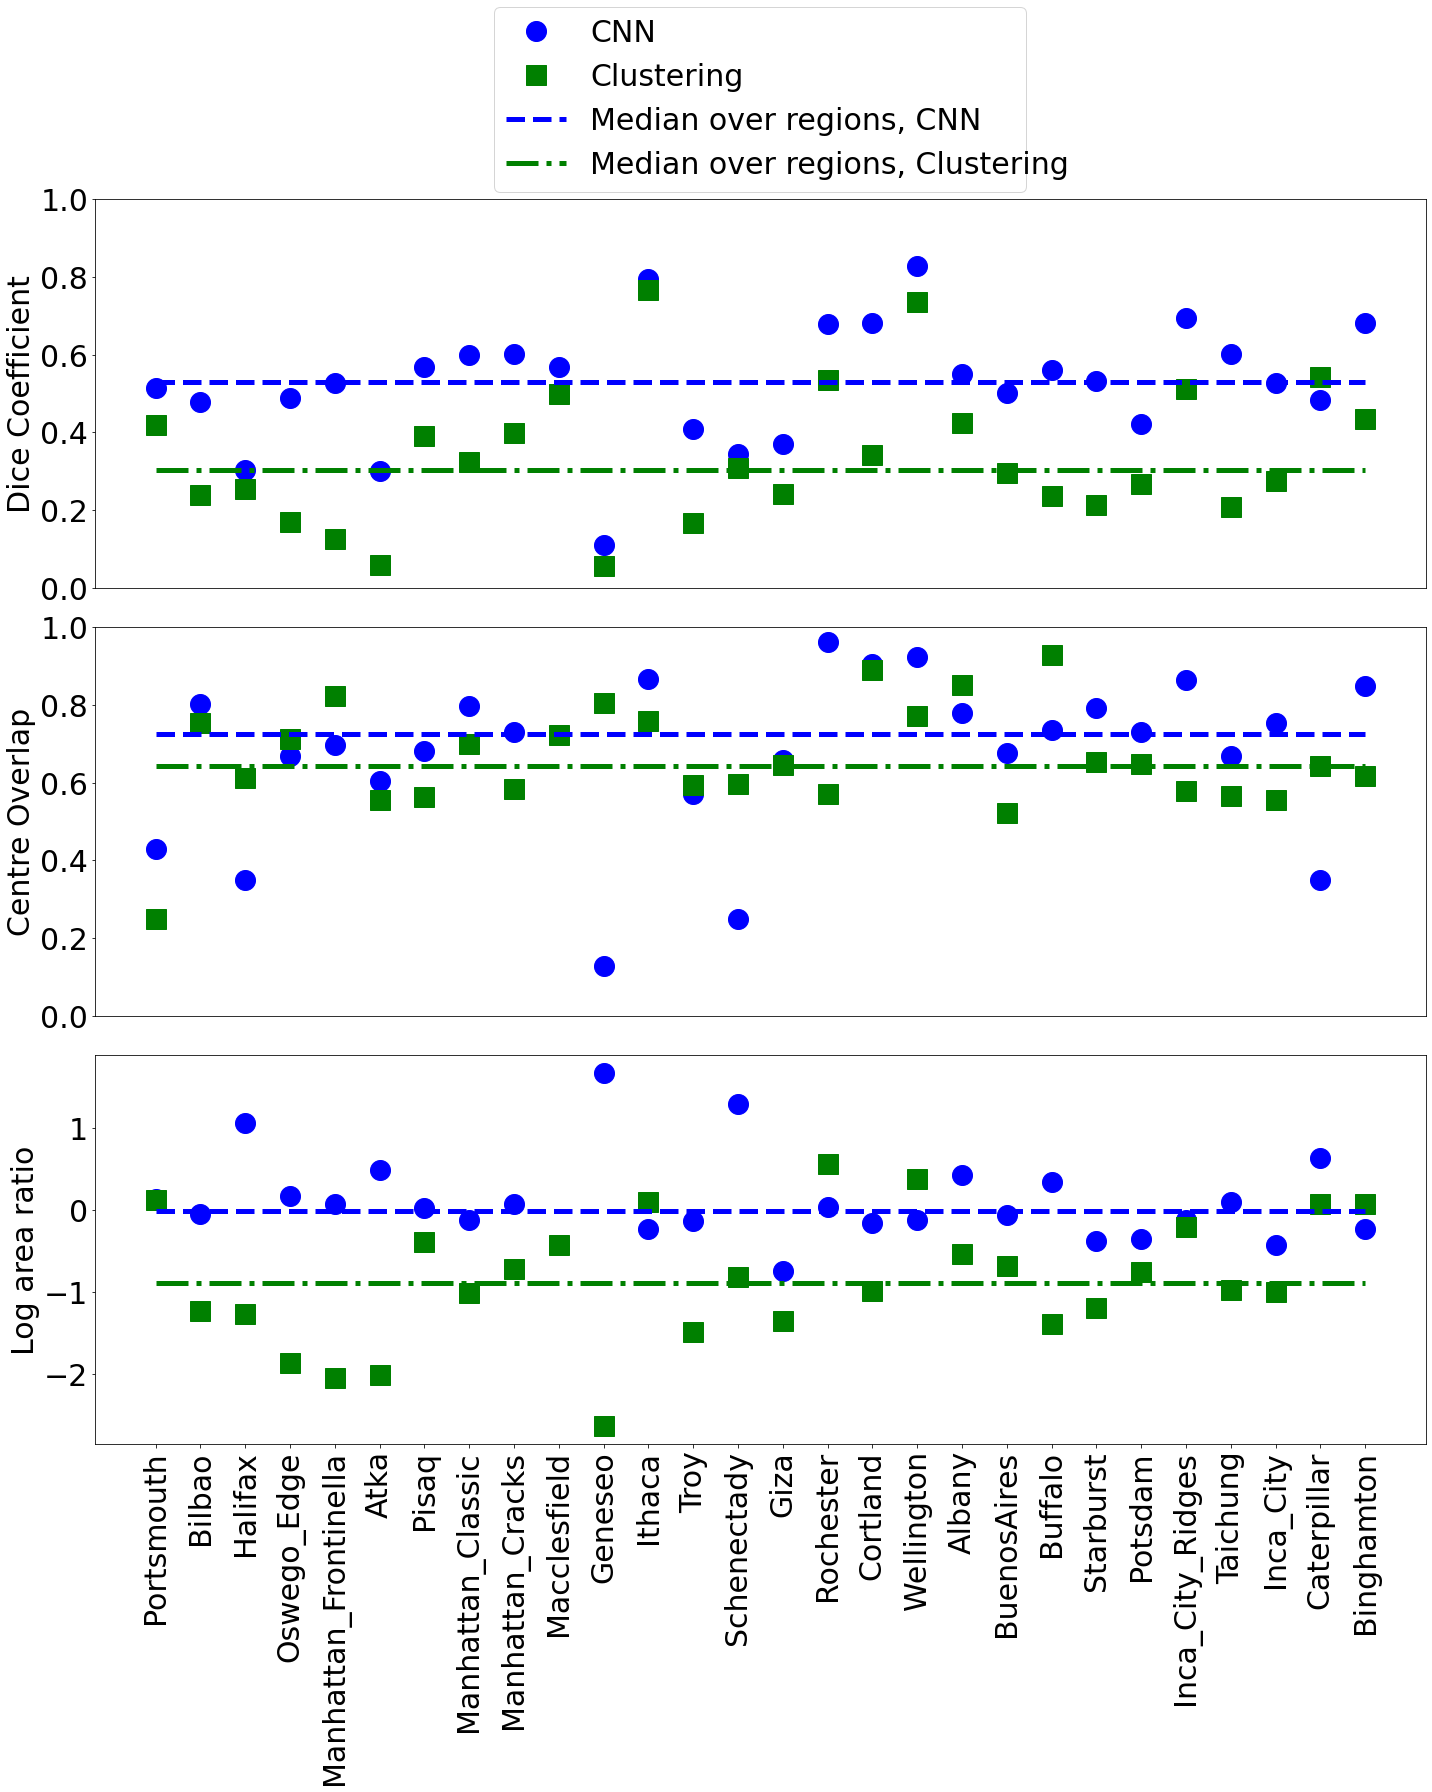

In [8]:
#regional summary
fig, [ax1,ax2,ax3] = plt.subplots(nrows=3, ncols=1,figsize=(20,25))

#plot Dice coefficient
ax1.plot(ML_df['Region Dice'],'o',markersize=20,label='CNN',color='b')
ax1.plot(Clustering_df['Region Dice'],'s',markersize=20,label='Clustering',color='g')
ax1.plot(ML_df['Region Dice'].median()*np.ones(ML_df['Region Dice'].shape[0]),'--b',label='Median over regions, CNN',linewidth=5)
ax1.plot(Clustering_df['Region Dice'].median()*np.ones(Clustering_df['Region Dice'].shape[0]),'-.g',label='Median over regions, Clustering',linewidth=5)

#plot centre overlap
ax2.plot(ML_df['Region Centre Correct Fraction'],'o',markersize=20,label='CNN',color='b')
ax2.plot(Clustering_df['Region Centre Correct Fraction'],'s',markersize=20,label='CNN',color='g')
ax2.plot(ML_df['Region Centre Correct Fraction'].median()*np.ones(ML_df['Region Centre Correct Fraction'].shape[0]),'--b',label='Median over regions, CNN',linewidth=5)
ax2.plot(Clustering_df['Region Centre Correct Fraction'].median()*np.ones(Clustering_df['Region Centre Correct Fraction'].shape[0]),'-.g',label='Median over regions, Clustering',linewidth=5)

#plot log area ratio
ax3.plot(np.log(ML_df['Region Area Ratio']),'o',markersize=20,color='b',label='CNN')
ax3.plot(np.log(Clustering_df['Region Area Ratio']),'s',markersize=20,label='Clustering',color='g')
ax3.plot(np.log(ML_df['Region Area Ratio'].median())*np.ones(ML_df['Region Area Ratio'].shape[0]),'--b',label='Median over regions, CNN',linewidth=5)
ax3.plot(np.log(Clustering_df['Region Area Ratio'].median())*np.ones(Clustering_df['Region Area Ratio'].shape[0]),'-.g',label='Median over regions, Clustering',linewidth=5)

ax1.set_xticklabels([])
ax1.set_xticks([])
ax2.set_xticklabels([])
ax2.set_xticks([])
ax3.set_xticklabels(ML_df.index,rotation=90,fontsize=30)
ax1.set_ylabel('Dice Coefficient',fontsize=30)
ax2.set_ylabel('Centre Overlap',fontsize=30)
ax3.set_ylabel('Log area ratio',fontsize=30)
ax1.legend(fontsize=30, bbox_to_anchor=(0.3,1.02,0.4,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=1)
ax1.set_ylim(0,1)
ax2.set_ylim(0,1)

matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)

fig.tight_layout()
plt.savefig(FiguresPath+'Figure7.pdf')
plt.show()

In [9]:
#create shading grid for Dice
Precisions = np.arange(1/999,1,1/1001)
Recalls = np.arange(1/999,1,1/1001)
Dices = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        Dices[i,j] = 2*Precisions[i]*Recalls[j]/(Precisions[i]+Recalls[j])
Dices.shape

(1000, 1000)

In [10]:
# Get the colormap colors, multiply them with the factor "a", and create new colormap
from matplotlib.colors import ListedColormap
my_cmap = plt.cm.gist_gray(np.arange(plt.cm.RdBu.N))
my_cmap[:,0:3] = my_cmap[:,0:3]**0.3
my_cmap = ListedColormap(my_cmap)

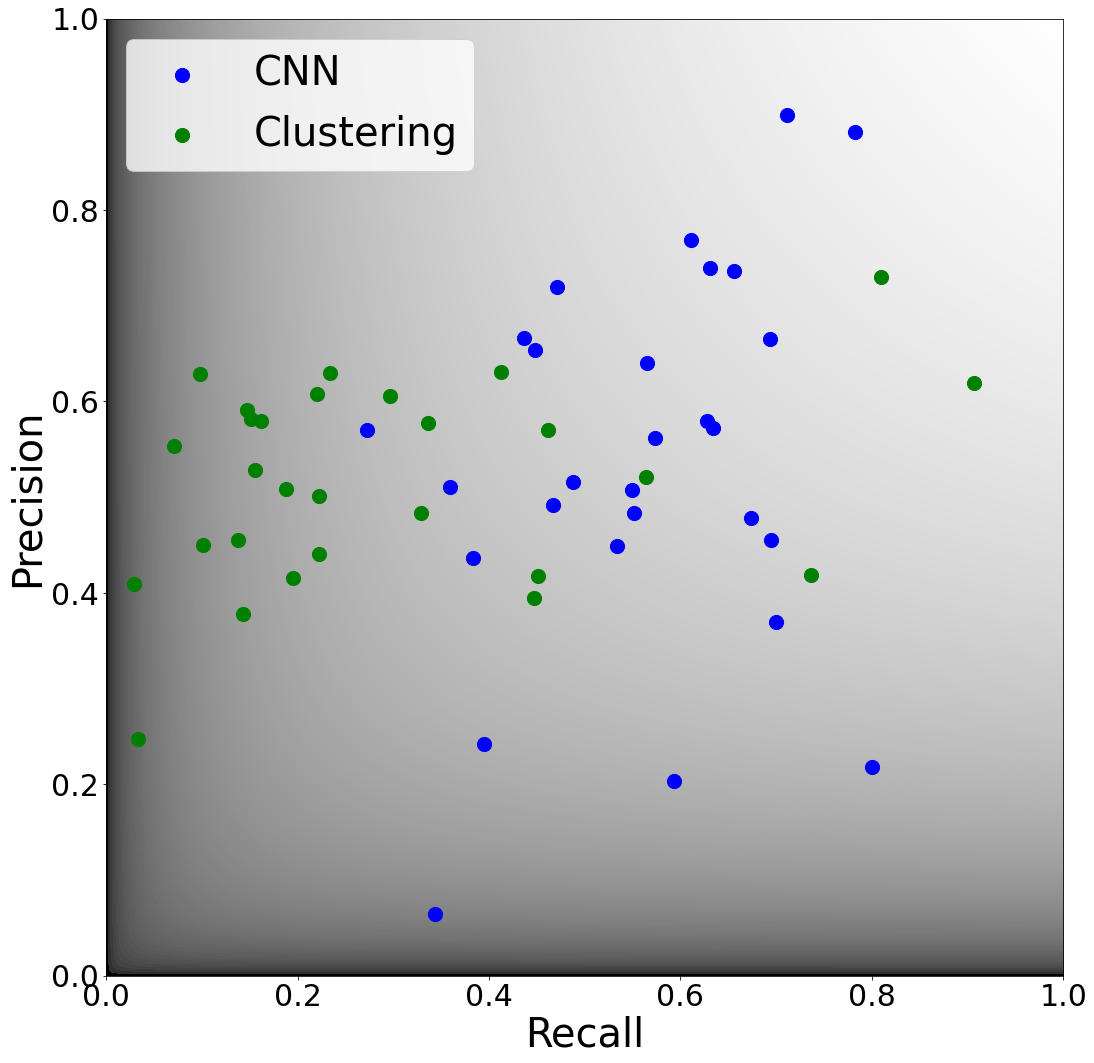

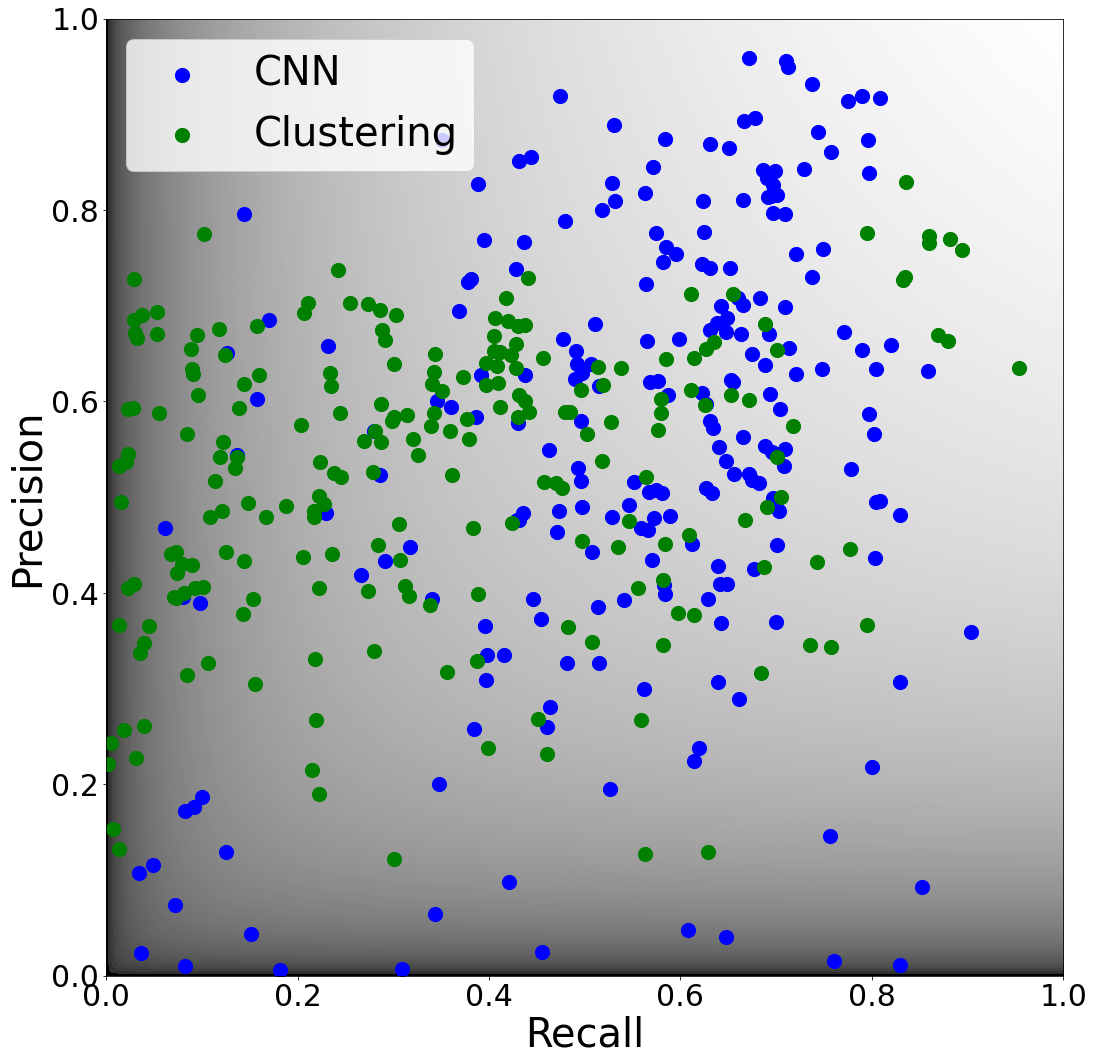

In [11]:
#more regional summmary
fig=plt.figure(figsize=(15,15))

#reviewer asked to remove bubblesize
#plt.scatter('Region Precision','Region Recall',s='Bubblesize',data=ML_df,alpha=0.7,label='CNN',color='blue')
#plt.scatter('Region Precision','Region Recall',s='Bubblesize',data=Clustering_df,alpha=0.7,label='Clustering',color='green')
plt.scatter('Region Precision','Region Recall',s=200,data=ML_df,alpha=1,label='CNN',color='blue')
plt.scatter('Region Precision','Region Recall',s=200,data=Clustering_df,alpha=1,label='Clustering',color='green')
plt.imshow(Dices/10,cmap=my_cmap,origin=(0,0),extent=(0.0,1.0,0.0,1.0))

plt.xlabel('Recall',fontsize=40)
plt.ylabel('Precision',fontsize=40)
ax=plt.gca()
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.legend(fontsize=40,loc='upper left')
plt.tight_layout()
plt.savefig(FiguresPath+'Figure8.pdf')
plt.show()

fig=plt.figure(figsize=(15,15))


#plt.scatter('Precision','Recall',s='Bubblesize',data=ML_image_df,alpha=0.7,label='CNN',color='blue')
#plt.scatter('Precision','Recall',s='Bubblesize',data=Clustering_image_df,alpha=0.7,label='Clustering',color='green')
plt.scatter('Precision','Recall',s=200,data=ML_image_df,alpha=1,label='CNN',color='blue')
plt.scatter('Precision','Recall',s=200,data=Clustering_image_df,alpha=1,label='Clustering',color='green')
plt.imshow(Dices/10,cmap=my_cmap,origin=(0,0),extent=(0.0,1.0,0.0,1.0))


plt.xlabel('Recall',fontsize=40)
plt.ylabel('Precision',fontsize=40)
ax=plt.gca()
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.legend(fontsize=40,loc='upper left')
plt.tight_layout()
plt.savefig(FiguresPath+'Figure10.pdf')
plt.show()

<ipython-input-12-8084422d7af1>:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


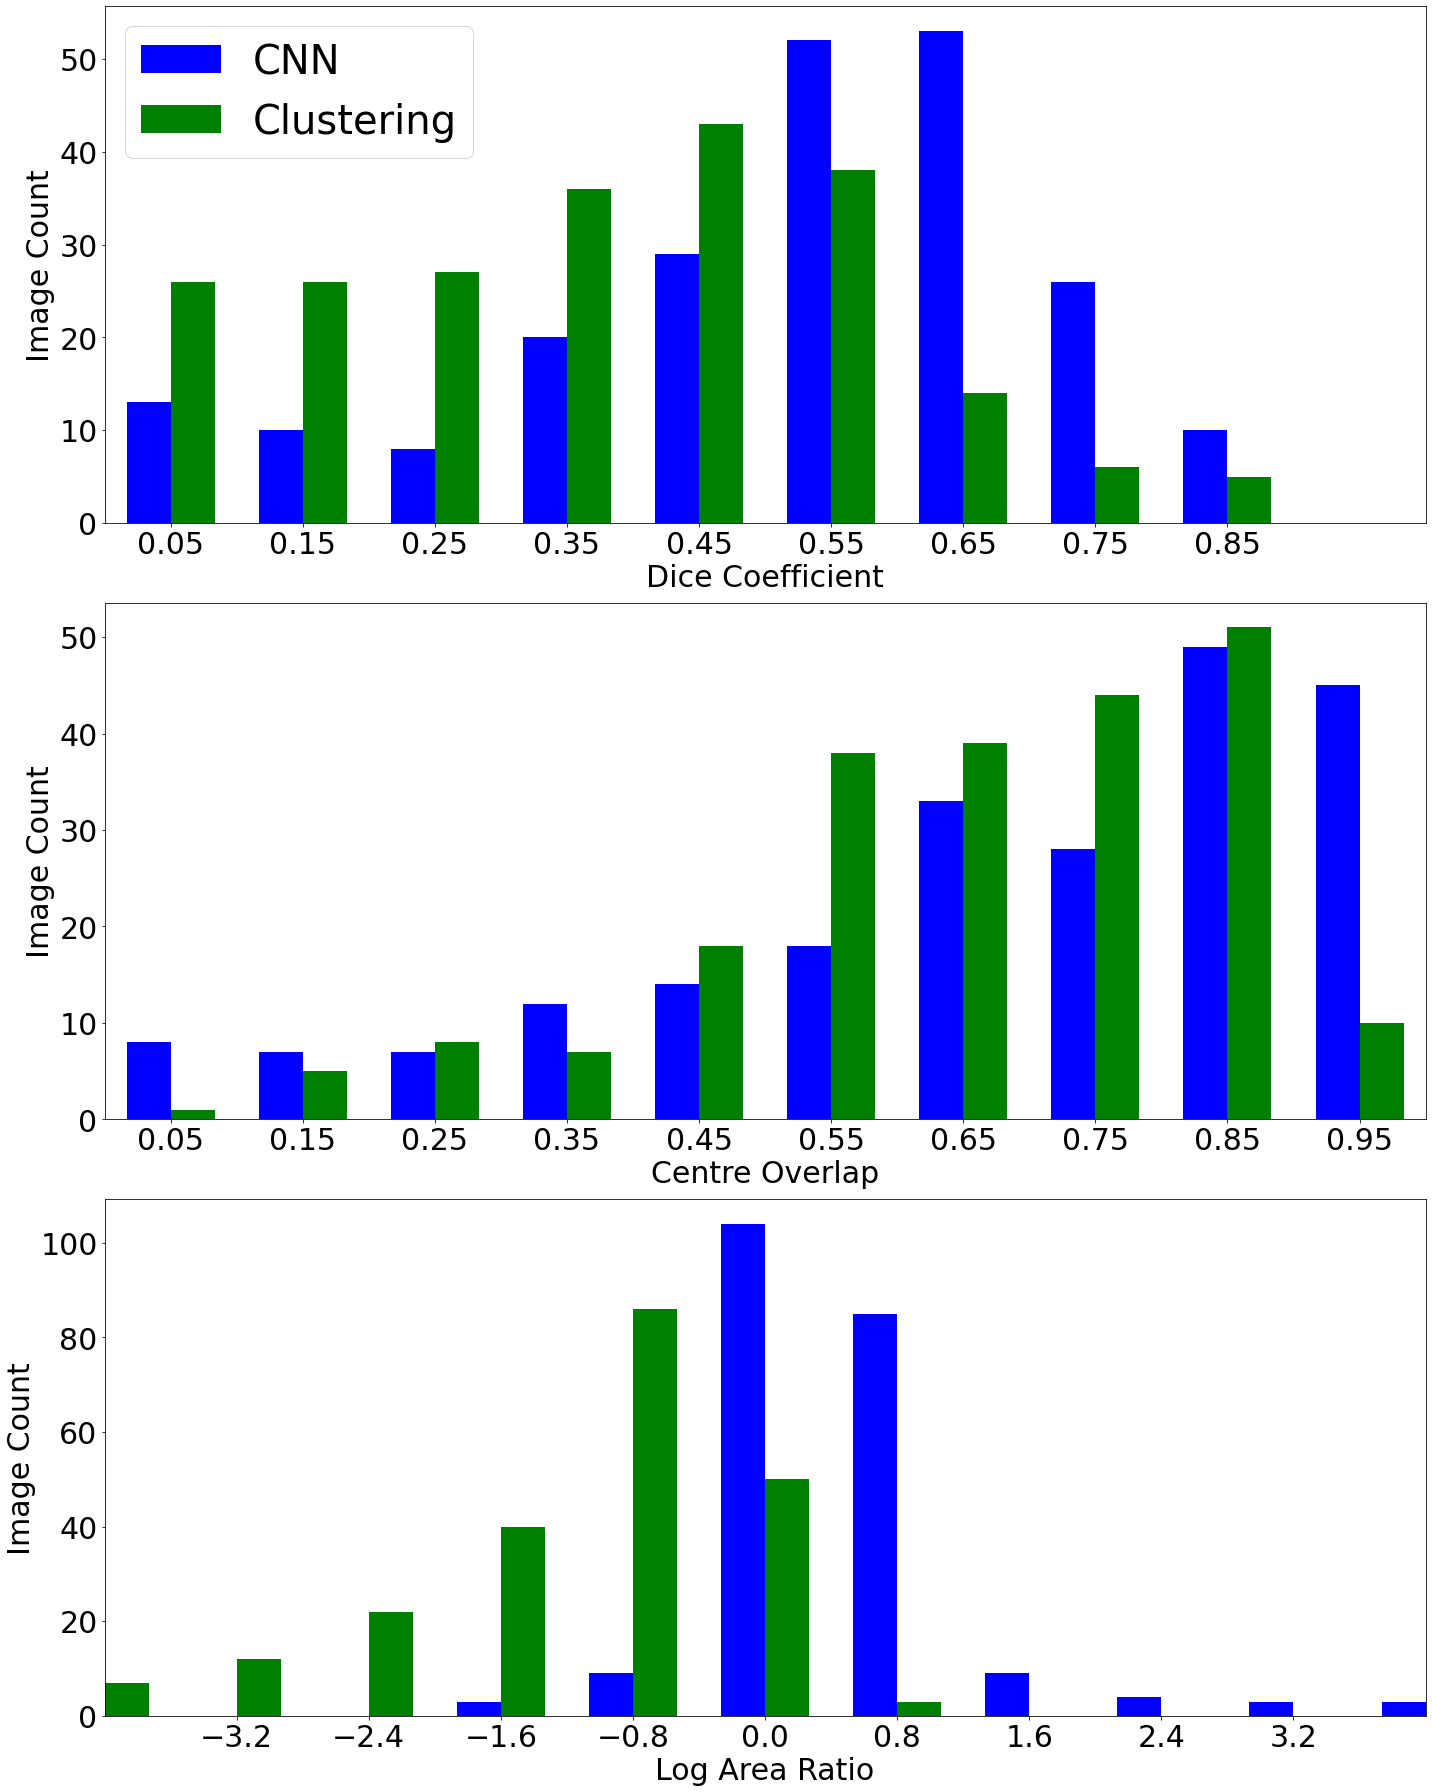

In [12]:
#Per image histograms
fig, [ax1,ax2,ax3] = plt.subplots(nrows=3, ncols=1,figsize=(20,25))

#plot Dice coefficient
aa=Clustering_image_df.dropna()
ax1.hist(ML_image_df['Dice']-0.05/3,bins=np.arange(0,1,0.1)-0.05/3,alpha=1,label='CNN',color='b',rwidth=0.333)
ax1.hist(aa['Dice']+0.05/3,bins=np.arange(0,1,0.1)+0.05/3,alpha=1,label='Clustering',color='g',rwidth=0.333)
ax1.set_xlim(0,1)
ax1.set_xticks(np.arange(0.05,0.95,0.1))
ax1.set_xlabel('Dice Coefficient',fontsize=30)
ax1.set_ylabel('Image Count',fontsize=30)
ax1.legend(fontsize=40,loc='upper left')
#ax1.set_ylim(0,1)

#plot centre overlap
ax2.hist(ML_image_df['Centre Correct Fraction']-0.05/3,bins=np.arange(0,1.1,0.1)-0.05/3,alpha=1,label='CNN',color='b',rwidth=0.333)
ax2.hist(aa['Centre Correct Fraction']+0.05/3,bins=np.arange(0,1.1,0.1)+0.05/3,alpha=1,label='Clustering',color='g',rwidth=0.333)
ax2.set_xlim(0,1)
ax2.set_xticks(np.arange(0.05,1.05,0.1))
ax2.set_xlabel('Centre Overlap',fontsize=30)
ax2.set_ylabel('Image Count',fontsize=30)
#ax2.set_ylim(0,1)

#area ratio
ax3.hist(np.log(ML_image_df['Area Ratio'])+8/30,bins=np.arange(-4,4+8/30,8/10)+8/30,alpha=1,label='CNN',color='b',rwidth=0.333)
ax3.hist(np.log(aa['Area Ratio'])-8/30,bins=np.arange(-4,4+8/30,8/10)-8/30,alpha=1,label='Clustering',color='g',rwidth=0.333)
ax3.set_xlim(-4,4)
ax3.set_xticks(np.arange(-4+8/10,4,8/10))
#ax3.set_xticks(np.arange(0.05,0.95,0.1))
ax3.set_xlabel('Log Area Ratio',fontsize=30)
ax3.set_ylabel('Image Count',fontsize=30)

matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)

plt.tight_layout()
plt.savefig(FiguresPath+'Figure9.pdf')
fig.show()

In [13]:
#solar longitude
r1 = np.corrcoef(ML_image_df['SOLAR_LONGITUDE'], ML_image_df['Dice'])
r2=scipy.stats.pearsonr(ML_image_df['SOLAR_LONGITUDE'], ML_image_df['Dice'])    # Pearson's r
r3=scipy.stats.spearmanr(ML_image_df['SOLAR_LONGITUDE'], ML_image_df['Dice'])   # Spearman's rho
r4=scipy.stats.kendalltau(ML_image_df['SOLAR_LONGITUDE'], ML_image_df['Dice']) 

print(r1)
print(r2)
print(r3)
print(r4)

r1 = np.corrcoef(Clustering_image_df['SOLAR_LONGITUDE'], Clustering_image_df['Dice'])
r2=scipy.stats.pearsonr(Clustering_image_df['SOLAR_LONGITUDE'], Clustering_image_df['Dice'])    # Pearson's r
r3=scipy.stats.spearmanr(Clustering_image_df['SOLAR_LONGITUDE'], Clustering_image_df['Dice'])   # Spearman's rho
r4=scipy.stats.kendalltau(Clustering_image_df['SOLAR_LONGITUDE'], Clustering_image_df['Dice']) 

print(r1)
print(r2)
print(r3)
print(r4)

[[ 1.         -0.22164762]
 [-0.22164762  1.        ]]
(-0.2216476172966912, 0.000907598844351764)
SpearmanrResult(correlation=-0.19233215115568056, pvalue=0.004106650686076064)
KendalltauResult(correlation=-0.12760180995475115, pvalue=0.004757085268775707)
[[ 1.         -0.31995262]
 [-0.31995262  1.        ]]
(-0.31995261580619083, 1.1871800352270636e-06)
SpearmanrResult(correlation=-0.292147598029951, pvalue=1.0093464358857227e-05)
KendalltauResult(correlation=-0.20156314273961334, pvalue=8.221041911792538e-06)


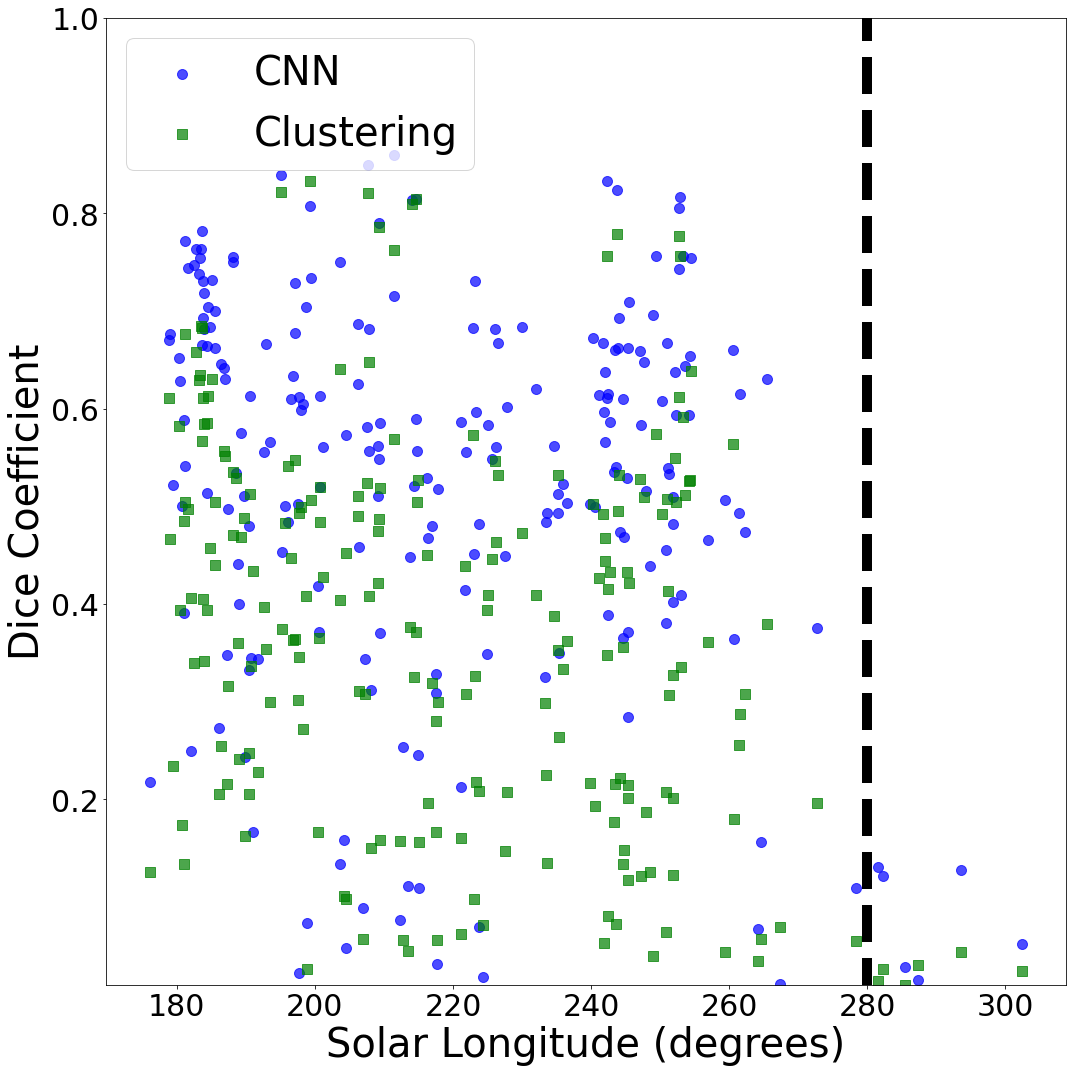

In [14]:
#solar longitude plot
fig=plt.figure(figsize=(15,15))
plt.scatter('SOLAR_LONGITUDE','Dice',data=ML_image_df,s=100,alpha=0.7,label='CNN',color='blue')
plt.scatter('SOLAR_LONGITUDE','Dice',data=Clustering_image_df,s=100,alpha=0.7,label='Clustering',color='green',marker='s')


plt.xlabel('Solar Longitude (degrees)',fontsize=40)
plt.ylabel('Dice Coefficient',fontsize=40)
plt.plot([280,280],[0,1],color='k',linestyle='--',linewidth=10)
ax=plt.gca()
#ax.set_xlim(0,1)
ax.set_ylim(0.01,1)
ax.legend(fontsize=40,loc='upper left')
plt.tight_layout()
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
plt.savefig(FiguresPath+'Figure11a.pdf')
plt.show()

In [15]:
ML_image_df

,Region name,Image name,JI,Dice,Area Ratio,Recall,Precision,TP,TN,FP,FN,Centre Correct,IMAGE_CENTER_LATITUDE,IMAGE_CENTER_LONGITUDE,SOLAR_LONGITUDE,START_TIME,map_scale,north_azimuth,# of tiles,lat_IND,lon_IND,roi_name,minimal_distance,lat_WORD,lon_WORD,time,MY,Centre Correct Fraction,Centre Correct Count,Centre P4 Count,Bubblesize
ESP_012225_0980,Albany,ESP_012225_0980,0.261267,0.414293,2.085603,0.306469,0.639172,1705463.0,55970960.0,962775.0,3859422.0,0.0,-81.9461,60.4644,221.812,2009-03-06 01:35:09,0.50,108.574809,144.0,-81.9461,60.4644,Albany,2.061556,-81.930,60.400,2009-03-06 01:35:09,29,0.543389,1196.0,2201.0,514
ESP_012291_0980,Albany,ESP_012291_0980,0.411202,0.582769,1.253048,0.523925,0.656503,2773115.0,55754448.0,1450957.0,2519848.0,0.0,-81.9366,60.4442,225.013,2009-03-11 05:00:23,0.50,110.367383,144.0,-81.9366,60.4442,Albany,1.011477,-81.930,60.400,2009-03-11 05:00:23,29,0.832776,1992.0,2392.0,1018
ESP_012304_0980,Albany,ESP_012304_0980,0.377360,0.547947,1.559612,0.449641,0.701266,2187244.0,56702468.0,931748.0,2677174.0,0.0,-81.9400,60.4432,225.645,2009-03-12 05:19:05,0.50,105.125140,144.0,-81.9400,60.4432,Albany,1.305858,-81.930,60.400,2009-03-12 05:19:04,29,0.756469,1988.0,2628.0,900
ESP_012436_0980,Albany,ESP_012436_0980,0.449229,0.619956,1.288178,0.550611,0.709285,1972246.0,50315564.0,808367.0,1609678.0,0.0,-81.9405,60.4513,232.092,2009-03-22 12:10:02,0.50,109.045590,126.0,-81.9405,60.4513,Albany,1.421614,-81.930,60.400,2009-03-22 12:10:02,29,0.894845,2170.0,2425.0,1153
ESP_012647_0980,Albany,ESP_012647_0980,0.443750,0.614719,1.631817,0.495714,0.808914,1745499.0,58564904.0,412331.0,1775685.0,0.0,-81.9383,60.4502,242.477,2009-04-07 22:46:33,0.50,109.825710,144.0,-81.9383,60.4502,Albany,1.215714,-81.930,60.400,2009-04-07 22:46:33,29,0.827886,2761.0,3335.0,1133
ESP_012038_0930,Atka,ESP_012038_0930,0.145458,0.253973,1.741416,0.199908,0.348123,429491.0,109877040.0,804242.0,1718951.0,0.0,-86.9844,169.8150,212.826,2009-02-19 11:51:15,0.25,153.963594,270.0,-86.9844,169.8150,Atka,0.835937,-86.980,169.700,2009-02-19 11:51:15,29,0.355191,65.0,183.0,193
ESP_012671_0930,Atka,ESP_012671_0930,0.370018,0.540165,1.151041,0.504725,0.580959,110883.0,23236006.0,79979.0,108807.0,0.0,-86.9850,169.8490,243.661,2009-04-09 19:37:46,0.50,154.104071,54.0,-86.9850,169.8490,Atka,1.038922,-86.980,169.700,2009-04-09 19:37:46,29,0.731034,318.0,435.0,875
ESP_012816_0930,Atka,ESP_012816_0930,0.294478,0.454975,1.376277,0.392780,0.540574,83983.0,31043056.0,71376.0,129834.0,0.0,-86.9846,169.8260,250.830,2009-04-21 02:47:44,0.50,152.806965,72.0,-86.9846,169.8260,Atka,0.901595,-86.980,169.700,2009-04-21 02:47:44,29,0.585774,280.0,478.0,621
ESP_011420_0930,Bilbao,ESP_011420_0930,0.496788,0.663806,1.416760,0.566172,0.802130,1557978.0,21805190.0,384324.0,1193798.0,0.0,-87.0093,127.3170,184.304,2009-01-02 08:07:26,1.00,157.311404,54.0,-87.0093,127.3170,Bilbao,0.294714,-87.008,127.273,2009-01-02 08:07:26,29,0.944516,1464.0,1550.0,1321
ESP_011565_0930,Bilbao,ESP_011565_0930,0.207818,0.344121,2.602864,0.238165,0.619911,1754914.0,54054072.0,1075999.0,5613567.0,0.0,-87.0128,127.4690,190.814,2009-01-13 15:17:34,0.50,156.520964,144.0,-87.0128,127.4690,Bilbao,1.261363,-87.008,127.273,2009-01-13 15:17:34,29,0.575428,370.0,643.0,355


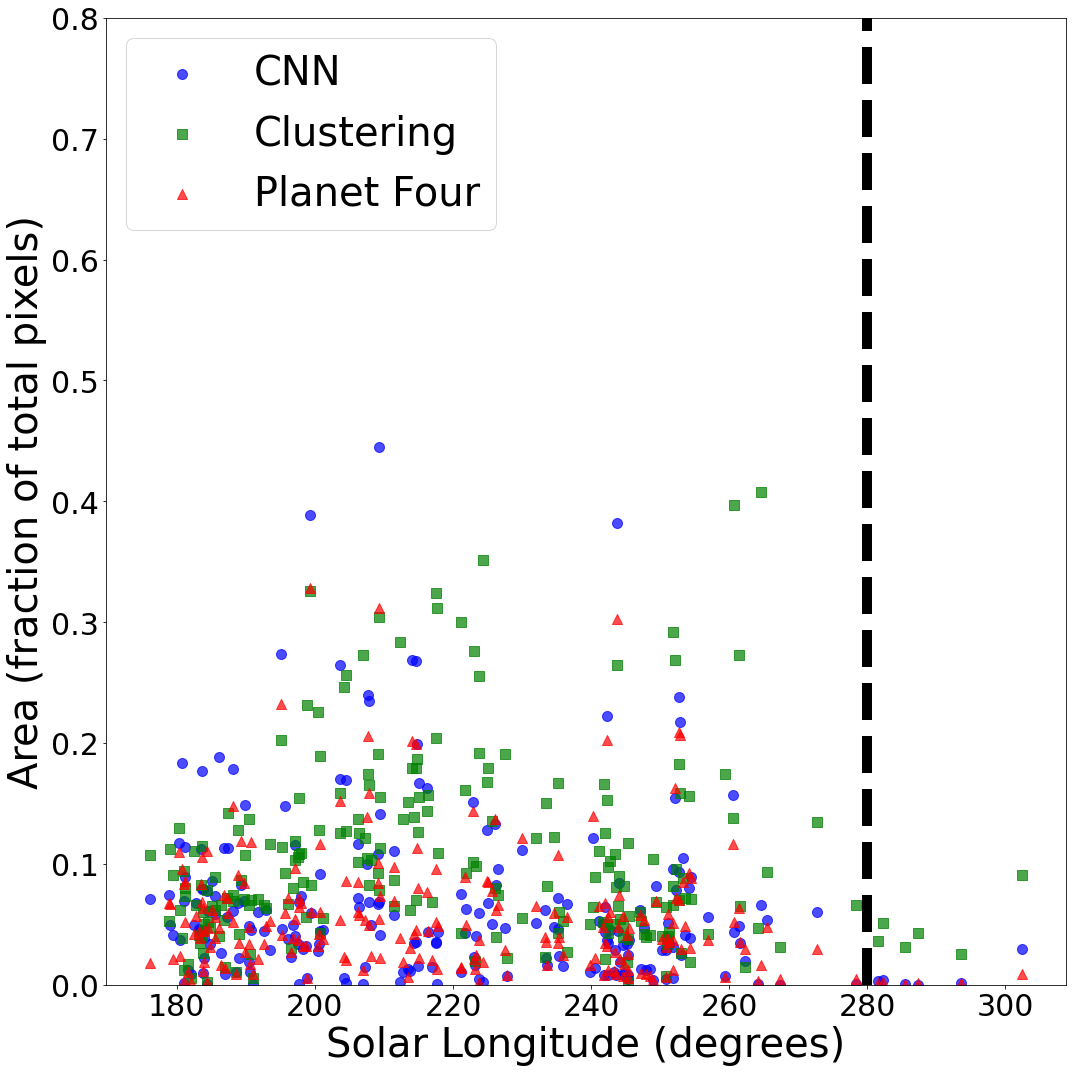

In [16]:
ML_image_df['Area_P4']=(ML_image_df['TP']+ML_image_df['FN'])/(ML_image_df['TP']+ML_image_df['FN']+ML_image_df['FP']+ML_image_df['TN'])
ML_image_df['Area_CNN']=(ML_image_df['TP']+ML_image_df['FP'])/(ML_image_df['TP']+ML_image_df['FN']+ML_image_df['FP']+ML_image_df['TN'])
Clustering_image_df['Area_cl']=(Clustering_image_df['TP']+Clustering_image_df['FP'])/(Clustering_image_df['TP']+Clustering_image_df['FN']+Clustering_image_df['FP']+Clustering_image_df['TN'])

fig=plt.figure(figsize=(15,15))
plt.scatter('SOLAR_LONGITUDE','Area_CNN',data=ML_image_df,s=100,alpha=0.7,label='CNN',color='blue')
plt.scatter('SOLAR_LONGITUDE','Area_cl',data=Clustering_image_df,s=100,alpha=0.7,label='Clustering',color='green',marker='s')
plt.scatter('SOLAR_LONGITUDE','Area_P4',data=ML_image_df,s=100,alpha=0.7,label='Planet Four',color='red',marker='^')


plt.xlabel('Solar Longitude (degrees)',fontsize=40)
plt.ylabel('Area (fraction of total pixels)',fontsize=40)
plt.plot([280,280],[0,1],color='k',linestyle='--',linewidth=10)
ax=plt.gca()
#ax.set_yscale('log')
#ax.set_xlim(0,1)
ax.set_ylim(0,0.8)

ax.legend(fontsize=40,loc='upper left')
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
plt.tight_layout()
plt.savefig(FiguresPath+'Figure11b.pdf')
plt.show()

In [17]:
ML_Tiles_df = pd.read_csv(ResultsPath+'SemanticSegmenterCNN_LORO_by_tiles.csv')
ML_Tiles_df.shape
ML_Tiles_df['Dice']=(2*ML_Tiles_df['TP']+1e-10)/(1e-10+2*ML_Tiles_df['TP']+ML_Tiles_df['FP']+ML_Tiles_df['FN'])
ML_Tiles_df['area ratio']=(1e-10+(1e-10+ML_Tiles_df['TP']+ML_Tiles_df['FN'])/(1e-10++ML_Tiles_df['TP']+ML_Tiles_df['FP']))

Clustering_Tiles_df = pd.read_csv(ClusteringPath+'Clustering_by_tiles.csv')
Clustering_Tiles_df.shape
Clustering_Tiles_df['Dice']=(2*Clustering_Tiles_df['TP']+1e-10)/(1e-10+2*Clustering_Tiles_df['TP']+Clustering_Tiles_df['FP']+Clustering_Tiles_df['FN'])
Clustering_Tiles_df['area ratio']=(1e-10+(1e-10+Clustering_Tiles_df['TP']+Clustering_Tiles_df['FN'])/(1e-10+Clustering_Tiles_df['TP']+Clustering_Tiles_df['FP']))


assert ML_Tiles_df.isnull().values.any()==False

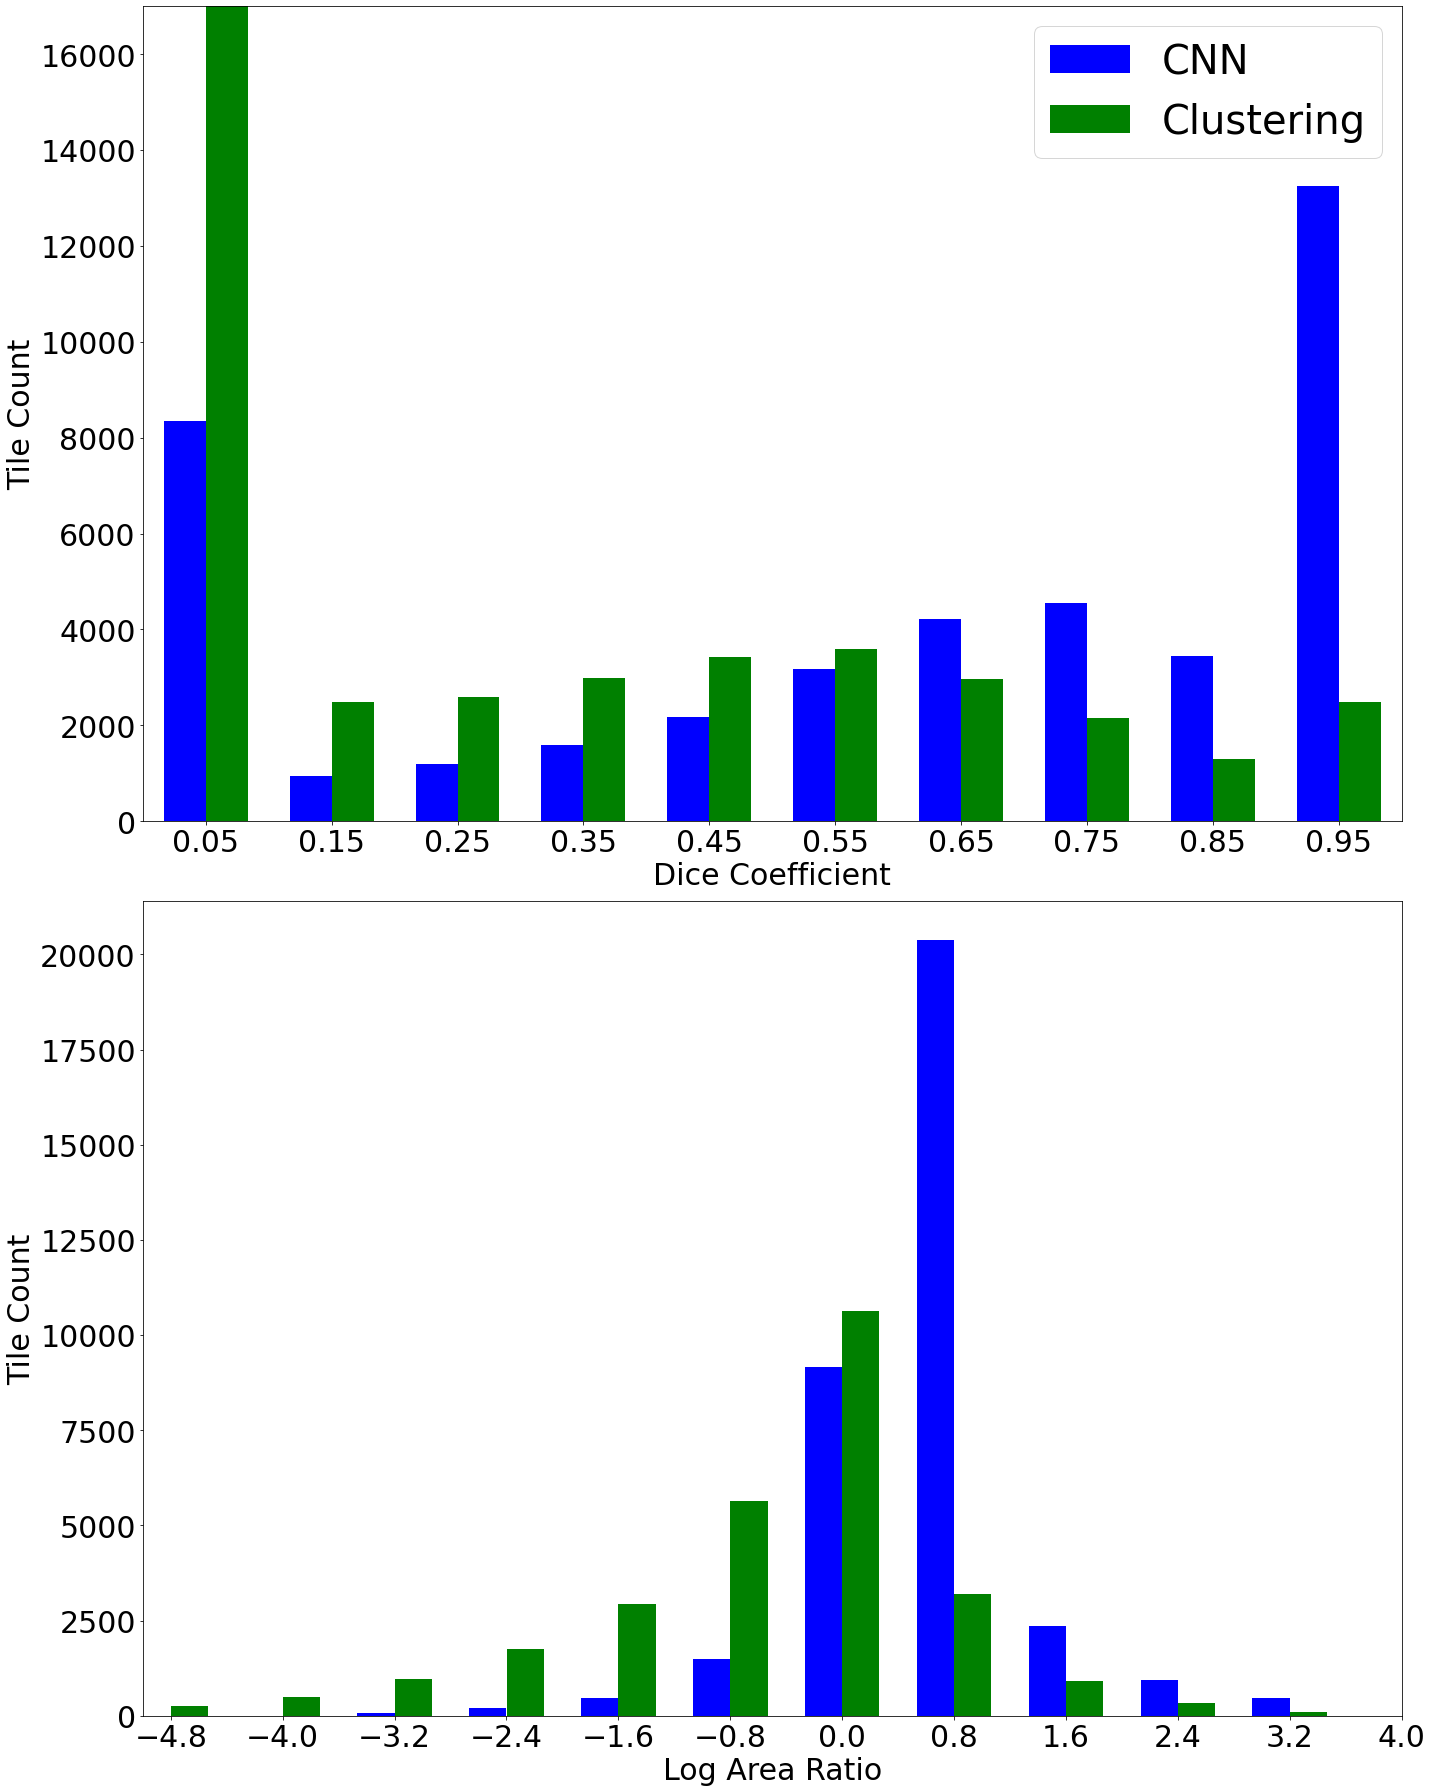

In [18]:
#Per tile histograms
fig, [ax1,ax2] = plt.subplots(nrows=2, ncols=1,figsize=(20,25))

#plot Dice coefficient
aa=Clustering_Tiles_df.dropna()
ax1.hist(ML_Tiles_df['Dice']-0.05/3,bins=np.arange(0,1.1,0.1)-0.05/3,alpha=1,label='CNN',color='b',rwidth=0.333)
ax1.hist(aa['Dice']+0.05/3,bins=np.arange(0,1.1,0.1)+0.05/3,alpha=1,label='Clustering',color='g',rwidth=0.333)
ax1.set_xlim(0,1)
ax1.set_xticks(np.arange(0.05,1,0.1))
ax1.set_xticks(np.arange(0.05,1.05,0.1))
ax1.set_xlabel('Dice Coefficient',fontsize=30)
ax1.set_ylabel('Tile Count',fontsize=30)
ax1.legend(fontsize=40,loc='upper right')
ax1.set_ylim(0,17000)

ax2.hist(np.log(ML_Tiles_df['area ratio'])+8/30,bins=np.arange(-4,4,8/10)+8/30,alpha=1,label='CNN',color='b',rwidth=0.333)
ax2.hist(np.log(aa['area ratio'])-8/30,bins=np.arange(-4.8,4.8,8/10)-8/30,alpha=1,label='Clustering',color='g',rwidth=0.333)
ax2.set_xlim(-5,4)
ax2.set_xticks(np.arange(-4.8,4.8,8/10))
#ax3.set_xticks(np.arange(0.05,0.95,0.1))
ax2.set_xlabel('Log Area Ratio',fontsize=30)
ax2.set_ylabel('Tile Count',fontsize=30)


matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

fig.tight_layout()
plt.savefig(FiguresPath+'Figure12.pdf')
plt.show()

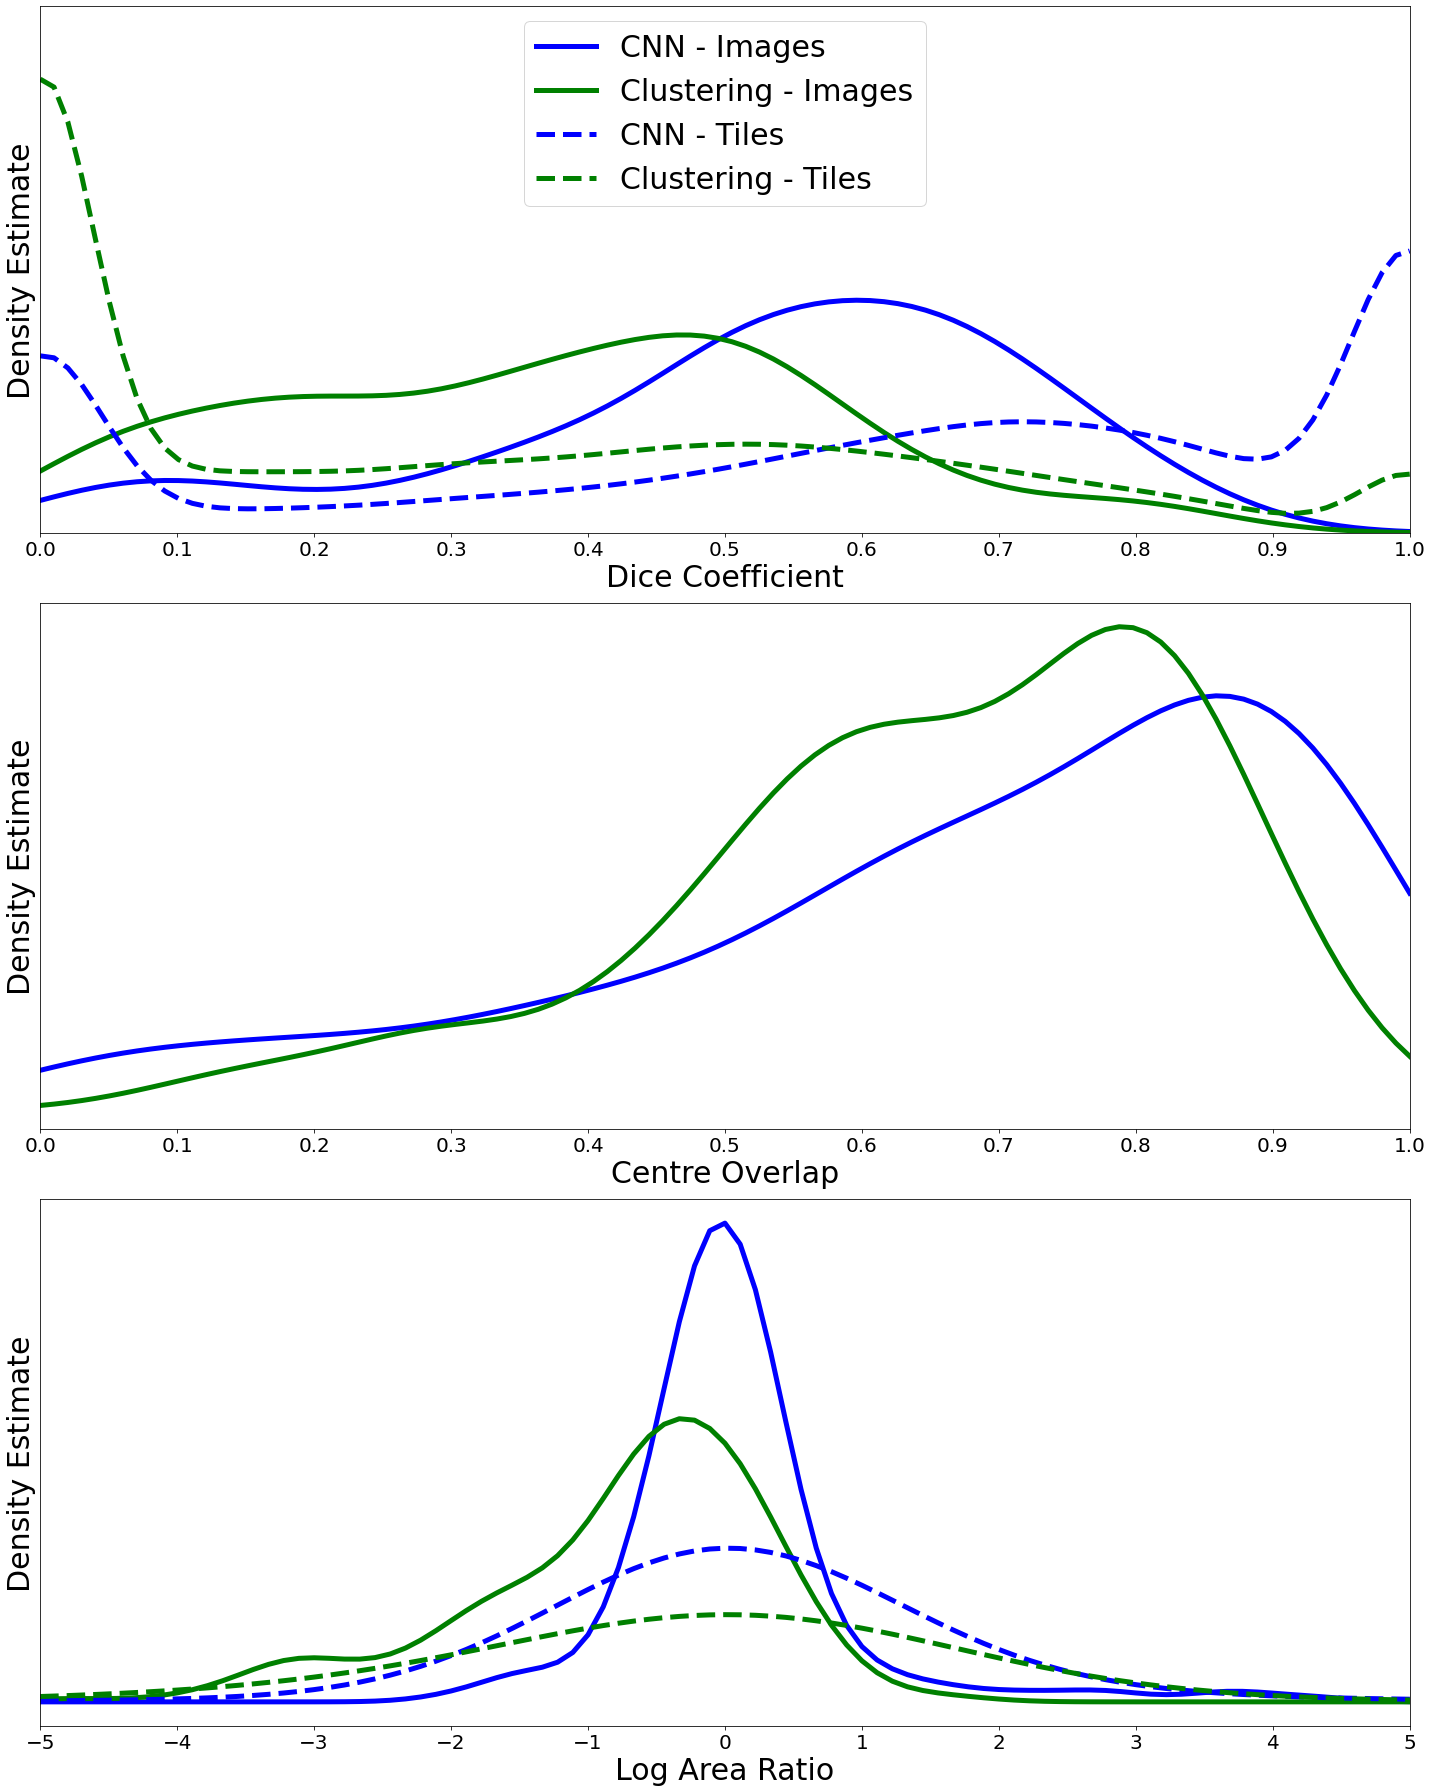

In [19]:
#try merging histograms

#Per image histograms
fig, [ax1,ax2,ax3] = plt.subplots(nrows=3, ncols=1,figsize=(20,25))

#plot Dice coefficient
aa=Clustering_image_df.dropna()
#ax1.hist(ML_image_df['Dice']-0.05/3,bins=np.arange(0,1,0.1)-0.05/3,alpha=1,label='CNN',color='b',rwidth=0.333,density=True)
#ax1.hist(aa['Dice']+0.05/3,bins=np.arange(0,1,0.1)+0.05/3,alpha=1,label='Clustering',color='g',rwidth=0.333,density=True)
density = kde.gaussian_kde(ML_image_df['Dice'])
x = np.linspace(0,1,100)
y=density(x)
ax1.plot(x, y,'b',linewidth=5)

aa=Clustering_image_df.dropna()['Dice']
density = kde.gaussian_kde(aa)
x = np.linspace(0,1,100)
y=density(x)
ax1.plot(x, y,'g',linewidth=5)

density = kde.gaussian_kde(ML_Tiles_df['Dice'])
x = np.linspace(0,1,100)
y=density(x)
ax1.plot(x, y,'--b',linewidth=5)

aa=Clustering_Tiles_df.dropna()['Dice']
density = kde.gaussian_kde(aa)
x = np.linspace(0,1,100)
y=density(x)
ax1.plot(x, y,'--g',linewidth=5)

ax1.set_xlim(0,1)
ax1.set_ylim(0,5)
ax1.set_xticks(np.arange(0.0,1.1,0.1))
ax1.set_yticks([])
ax1.set_xlabel('Dice Coefficient',fontsize=30)
ax1.set_ylabel('Density Estimate',fontsize=30)
ax1.legend(['CNN - Images','Clustering - Images','CNN - Tiles','Clustering - Tiles'],fontsize=30,loc='upper center')
#ax1.set_ylim(0,1)

#plot centre overlap
#ax2.hist(ML_image_df['Centre Correct Fraction']-0.05/3,bins=np.arange(0,1.1,0.1)-0.05/3,alpha=1,label='CNN',color='b',rwidth=0.333,density=True)
#ax2.hist(aa['Centre Correct Fraction']+0.05/3,bins=np.arange(0,1.1,0.1)+0.05/3,alpha=1,label='Clustering',color='g',rwidth=0.333,density=True)
density = kde.gaussian_kde(ML_image_df['Centre Correct Fraction'])
x = np.linspace(0,1,100)
y=density(x)
ax2.plot(x, y,'b',linewidth=5)

aa=Clustering_image_df.dropna()['Centre Correct Fraction']
density = kde.gaussian_kde(aa)
x = np.linspace(0,1,100)
y=density(x)
ax2.plot(x, y,'g',linewidth=5)


ax2.set_xlim(0,1)
ax2.set_xticks(np.arange(0,1.1,0.1))
ax2.set_yticks([])
ax2.set_xlabel('Centre Overlap',fontsize=30)
ax2.set_ylabel('Density Estimate',fontsize=30)
#ax2.set_ylim(0,1)

#area ratio
#ax3.hist(np.log(ML_image_df['Area Ratio'])+8/30,bins=np.arange(-4,4+8/30,8/10)+8/30,alpha=1,label='CNN',color='b',rwidth=0.333,density=True)
#ax3.hist(np.log(aa['Area Ratio'])-8/30,bins=np.arange(-4,4+8/30,8/10)-8/30,alpha=1,label='Clustering',color='g',rwidth=0.333,density=True)
density = kde.gaussian_kde(np.log(ML_image_df['Area Ratio']))
x = np.linspace(-5,6,100)
y=density(x)
ax3.plot(x, y,'b',linewidth=5)

aa=Clustering_image_df.dropna()['Area Ratio']
density = kde.gaussian_kde(np.log(aa))
x = np.linspace(-5,6,100)
y=density(x)
ax3.plot(x, y,'g',linewidth=5)

density = kde.gaussian_kde(np.log(ML_Tiles_df['area ratio']))
x = np.linspace(-5,6,100)
y=density(x)
ax3.plot(x, y,'--b',linewidth=5)

aa=Clustering_Tiles_df.dropna()['area ratio']
density = kde.gaussian_kde(np.log(aa))
x = np.linspace(-5,6,100)
y=density(x)
ax3.plot(x, y,'--g',linewidth=5)

ax3.set_xlim(-4,4)
ax3.set_xticks(np.arange(-5,6,1))
#ax3.set_xticks(np.arange(0.05,0.95,0.1))
ax3.set_yticks([])
ax3.set_xlabel('Log Area Ratio',fontsize=30)
ax3.set_ylabel('Density Estimate',fontsize=30)

matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)

fig.tight_layout()
plt.savefig(FiguresPath+'Figure9_new.pdf')
plt.show()

In [20]:
ML_Tiles_df.head()

,Unnamed: 0,tile_id0,obsid0,obsid1,region,SOLAR_LONGITUDE,START_TIME,JI,Dice,Precision,Recall,TP,TN,FP,FN,Unnamed: 0.1,x_tile,y_tile,x_hirise,y_hirise,PlanetocentricLatitude,PlanetographicLatitude,PositiveEast360Longitude,BodyFixedCoordinateX,BodyFixedCoordinateY,BodyFixedCoordinateZ,tile_id,obsid,area ratio
0,0,APF0000cwz,ESP_012079_0945,945,Macclesfield,214.785,2009-02-22 16:32:19,1.000000,1.000000,1.000000,1.000000,0.0,136080.0,0.0,0.0,0,1,1,420,324,-85.504144,-85.556701,104.952104,-68.380674,256.056147,-3370.636698,APF0000cwz,ESP_012079_0945,1.000000
1,1,APF0000ck9,ESP_012079_0945,945,Macclesfield,214.785,2009-02-22 16:32:19,1.000000,1.000000,1.000000,1.000000,0.0,136080.0,0.0,0.0,1,1,2,420,872,-85.502300,-85.554878,104.934805,-68.331337,256.181661,-3370.628630,APF0000ck9,ESP_012079_0945,1.000000
2,2,APF0000cty,ESP_012079_0945,945,Macclesfield,214.785,2009-02-22 16:32:19,0.497927,0.664821,0.520580,0.919629,20413.0,95084.0,18799.0,1784.0,2,1,3,420,1420,-85.500454,-85.553054,104.917486,-68.281853,256.307249,-3370.620295,APF0000cty,ESP_012079_0945,0.566077
3,3,APF0000ciy,ESP_012079_0945,945,Macclesfield,214.785,2009-02-22 16:32:19,0.634986,0.776748,0.702223,0.868970,6287.0,126179.0,2666.0,948.0,3,1,4,420,1968,-85.498607,-85.551229,104.900198,-68.232522,256.433112,-3370.615690,APF0000ciy,ESP_012079_0945,0.808109
4,4,APF0000cwp,ESP_012079_0945,945,Macclesfield,214.785,2009-02-22 16:32:19,0.796131,0.886495,0.845850,0.931245,2140.0,133392.0,390.0,158.0,4,1,5,420,2516,-85.496762,-85.549404,104.882968,-68.183281,256.558509,-3370.606455,APF0000cwp,ESP_012079_0945,0.908300
